# Predicting Home Prices
***By: Corina Lentz***

### ***Problem Statement***
---

The real estate market climbed to $36.2 trillion in 2020 [*source*](https://www.forbes.com/sites/brendarichardson/2021/01/26/housing-market-gains-more-value-in-2020-than-in-any-year-since-2005/). In 2021 the demand for homes has only increased [*source*](https://www.cnn.com/2021/06/16/homes/us-housing-market-offers/index.html). With this booming real estate market, predicting how much a home will sell for with a reasonable level of accuracy is more important than ever. That is where Lentz Data Analysis comes in. We will use data collected from Ames, Iowa house sales to build a multiple linear regression model that can predict the sale price of homes within a certain amount. We believe the most accurate model will have the overall quality of the home, the home type, and the number of bedrooms/bathrooms, along with measurements of the size and quality of any basement or garage features of the home. 

### ***Data Dictionary***
---

The data dictionary that I'm referencing for this dataset is found here: https://www.kaggle.com/c/dsir-524-project-2-regression-challenge/data .

### ***Importing Libraries & Reading In Data***
---

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.style.use('fivethirtyeight')

In [2]:
#Reading in dataset
ames = pd.read_csv('./datasets/train.csv')

### ***Cleaning & Pre-Processing***
---

In [3]:
#Changing the default column and row settings so that all will be shown.
#Using code found here: https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/ 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Taking a look at the data
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
ames.shape

(2051, 81)

In [5]:
#Checking null values
ames.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

The 'Alley', 'Pool QC', 'Fence', and 'Misc Feature' columns have less than 20% of rows with actual values (aka non-null values). It's unlikely these columns will be useful for accurately predicting house sales. Dropping the columns from our dataframe.

In [6]:
ames=ames.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature'])

Now I'll take a closer look at the other columns that have null values to decide how to proceed.

In [7]:
#Starting with 'Fireplace Qu' due to high number of null values
ames[(ames['Fireplace Qu']== 'TA') & (ames['SalePrice']< 100000)].shape

(4, 77)

After looking at the number of rows created when referencing specific fireplace qualities and minimum/maximum sale prices it seems likely fireplace quality will have a noticeable impact on the sale price. The data dictionary for this dataset indicates a null value in the 'Fireplace Qu' means the home didn't have any fireplaces. Replacing the null values with "NoFireplace".

In [8]:
ames['Fireplace Qu']=ames['Fireplace Qu'].fillna(value='NoFireplace')

In [9]:
#'Lot Frontage' also has a number of null values.
#Taking a closer look
ames[(ames['Lot Frontage']==0.0) | (ames['Lot Frontage']==0)][:20]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


The data dictionary indicates 'Lot Frontage' is the "Linear feet of street connected to property". Based on the lack of 0.0 or 0 values in the column, I'm assuming the null values are for homes with no linear street connected to the property. Replacing the null values with 0.0 so it is consistent with the rest of the column.

In [10]:
ames['Lot Frontage']=ames['Lot Frontage'].fillna(value=0.0)

The data dictionary indicates a null value in the columns 'Garage Type', 'Garage Finish', 'Garage Qual', or 'Garage Cond', means the house doesn't have a garage. Replacing these null values with "NoGarage" in these columns.

In [11]:
ames['Garage Type']=ames['Garage Type'].fillna(value='NoGarage')

ames['Garage Finish']=ames['Garage Finish'].fillna(value='NoGarage')

ames['Garage Qual']=ames['Garage Qual'].fillna(value='NoGarage')

ames['Garage Cond']=ames['Garage Cond'].fillna(value='NoGarage')

The 'Garage Yr Blt', 'Garage Cars', and 'Garage Area' columns are all numeric columns. I'm assuming that null values in these columns indicates there is no garage. Replacing these null values with 0 in 'Garage Yr Blt' and 'Garage Cars', and replacing the nulls in 'Garage Area' with 0.0 so the values are consistent with the other values in each column.

In [12]:
ames['Garage Yr Blt']=ames['Garage Yr Blt'].fillna(value=0)
ames['Garage Cars']=ames['Garage Cars'].fillna(value=0)
ames['Garage Area']=ames['Garage Area'].fillna(value=0.0)

Just like the columns related to the garage, the basement (abbreviated 'Bsmt') columns also have missing values. For the basement columns where the data dictionary indicates null values mean there is no basement I'm replacing the nulls with 'NoBsmt'. For the basement columns that are a measurement or a count of a feature I'm replacing the null values with 0 or 0.0 (whichever is consistent with the other values in that column).

In [13]:
ames['Bsmt Qual']=ames['Bsmt Qual'].fillna(value='NoBsmt')
ames['Bsmt Cond']=ames['Bsmt Cond'].fillna(value='NoBsmt')
ames['Bsmt Exposure']=ames['Bsmt Exposure'].fillna(value='NoBsmt')
ames['BsmtFin Type 1']=ames['BsmtFin Type 1'].fillna(value='NoBsmt')
ames['BsmtFin Type 2']=ames['BsmtFin Type 2'].fillna(value='NoBsmt')

In [14]:
ames['BsmtFin SF 1']=ames['BsmtFin SF 1'].fillna(value=0.0)
ames['BsmtFin SF 2']=ames['BsmtFin SF 2'].fillna(value=0.0)
ames['Bsmt Unf SF']=ames['Bsmt Unf SF'].fillna(value=0.0)
ames['Total Bsmt SF']=ames['Total Bsmt SF'].fillna(value=0.0)
ames['Bsmt Full Bath']=ames['Bsmt Full Bath'].fillna(value=0.0)
ames['Bsmt Half Bath']=ames['Bsmt Half Bath'].fillna(value=0.0)

The data dictionary indicates null values in the 'Mas Vnr Type' means that there is no masonry veneer in the home. I'm replacing those null values with "NoMasVnr". The column 'Mas Vnr Area' is a measurement of the same in square feet. I'll replace those null values with 0.0 to be consistent with the rest of the column.

In [15]:
ames['Mas Vnr Type']=ames['Mas Vnr Type'].fillna(value='NoMasVnr')
ames['Mas Vnr Area']=ames['Mas Vnr Area'].fillna(value=0.0)

In [16]:
#Confirming we are no more null values.
ames.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

In [17]:
#Taking a look at the data types for each column
ames.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
B

The data dictionary shows 'Central Air' with the values of "Y" and "N" . Changing this column into binary with 1 for 'Y' or Yes and 0 for 'N' or No.

In [18]:
ames['Central Air']=[1 if value=='Y' else 0 for value in ames['Central Air']]

Saving the cleaned dataset.

In [52]:
ames.to_csv('./datasets/train_clean', index=False)

Reading the cleaned dataset back in.

In [53]:
ames=pd.read_csv('./datasets/train_clean')

### ***Exploratory Data Analysis***
---

In [19]:
#Taking a look at summary statistics
ames.describe(include='all')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,2051.000000,2051.000000,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051,2051,2051,2051,2051.000000,2051,2051,2051,2051,2051,2051,2051,2051.000000,2051,2051.000000,2051.000000,2051.000000,2051,2051,2051.000000,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000,2051,2051.000000,2051,2051,2051.000000,2051,2051.000000,2051.000000,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,6,15,15,5,NaN,4,5,6,6,6,5,7,NaN,7,NaN,NaN,NaN,5,5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,6,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,NaN,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NoFireplace,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,NaN,NaN,NaN,NaN,1619,2025,724,721,1218,NaN,1247,1778,926,887,1834,1339,615,NaN,1749,NaN,NaN,NaN,2018,1065,NaN,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,1915,NaN,1000,1213,NaN,849,NaN,NaN,1832,1868,1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,57.944417,10065.208191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.112140,5.562165,1971.708922,1984.190151,NaN,NaN,NaN,NaN,NaN,98.626524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.084837,NaN,47.935641,567.451487,1057.471965,NaN,NaN,0.931253,NaN,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,NaN,6.435885,NaN,0.590931,NaN,NaN,1868.725987,NaN,1.775719,473.440761,NaN,NaN,NaN,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,33.137332,6742.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426271,1.104497,30.177889,21.036250,NaN,NaN,NaN,NaN,NaN,174.324690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.195041,NaN,164.964052,445.022846,449.908003,NaN,NaN,0.253085,NaN,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,NaN,1.560225,NaN,0.638516,NaN,NaN,454.133654,NaN,0.765357,216.135102,NaN,NaN,NaN,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.00000

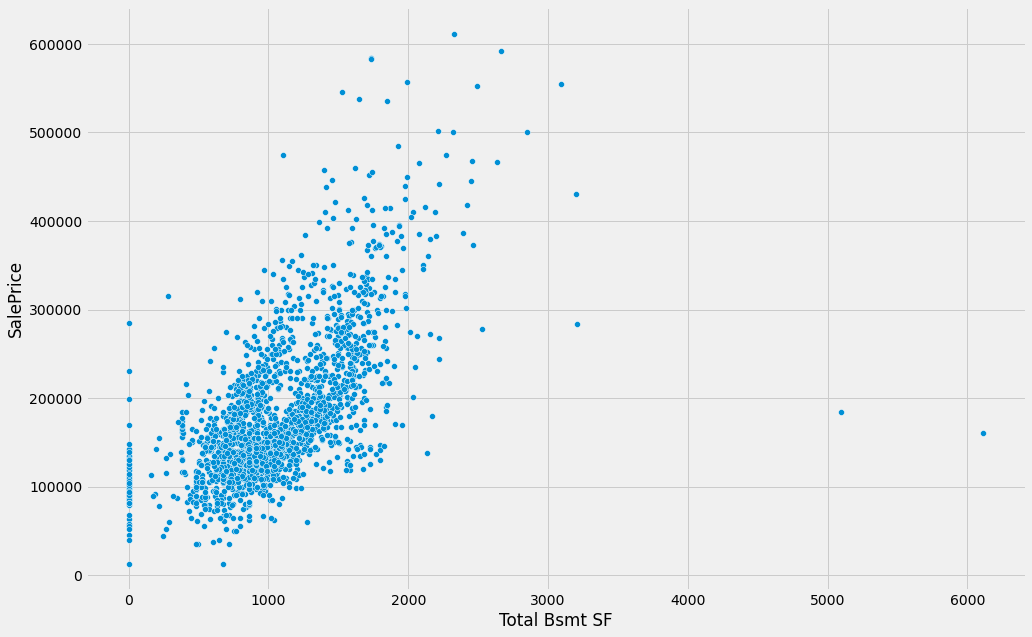

In [20]:
#Using scatterplot to see the relationship between 'Total Bsmt SF' and 'SalePrice'
plt.figure(figsize=(15,10))

sns.scatterplot(x=ames['Total Bsmt SF'],
               y=ames['SalePrice']);

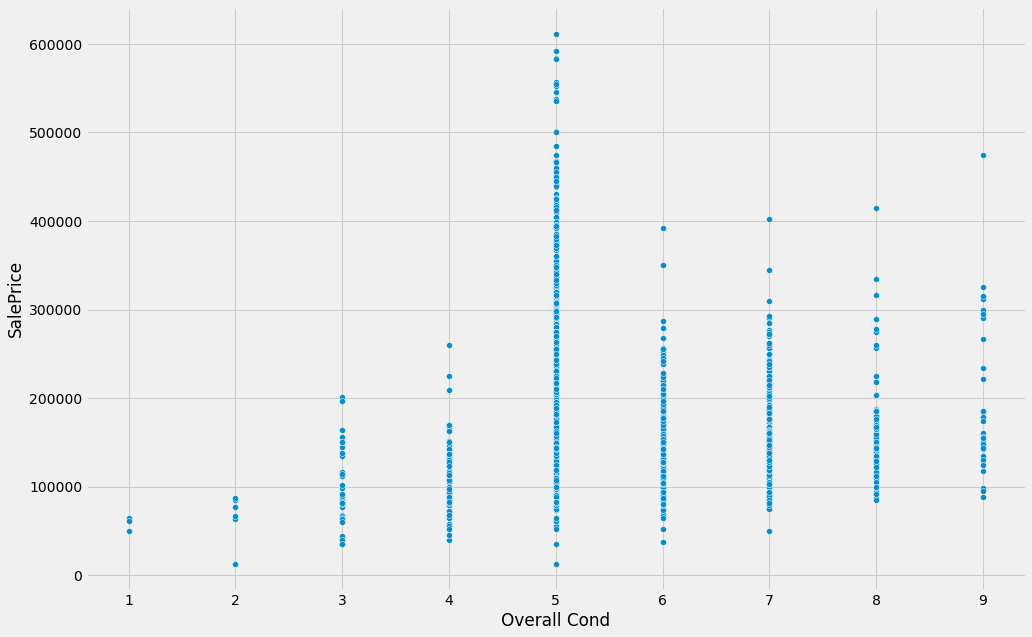

In [21]:
#Plotting 'Overall Cond' with 'SalePrice'
plt.figure(figsize=(15,10))

sns.scatterplot(x=ames['Overall Cond'],
               y=ames['SalePrice']);

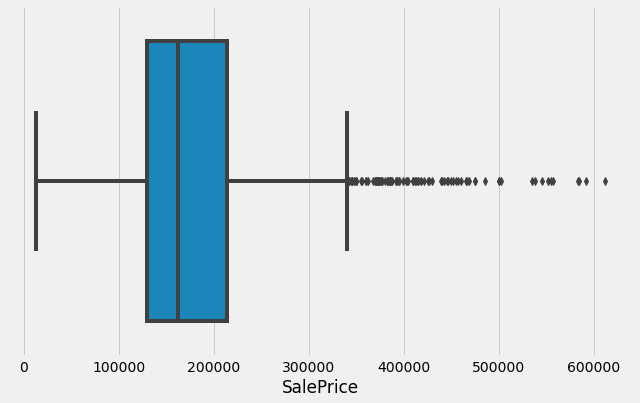

In [22]:
#Taking a look at the distribution for 'SalePrice'
plt.figure(figsize=(10, 6))

sns.boxplot(x = ames['SalePrice']);

In [23]:
#Seeing how many rows are above the 300k threshold.
ames[ames['SalePrice']>300000].shape

(164, 77)

In [24]:
#A small number of 'SalePrice' rows are over the $300k threshold, badly skewing our results. I was going to drop those rows with this formula,
#however it turned the whole column into True/False instead. Commenting it out.
#ames['SalePrice']=(ames['SalePrice']<300000)

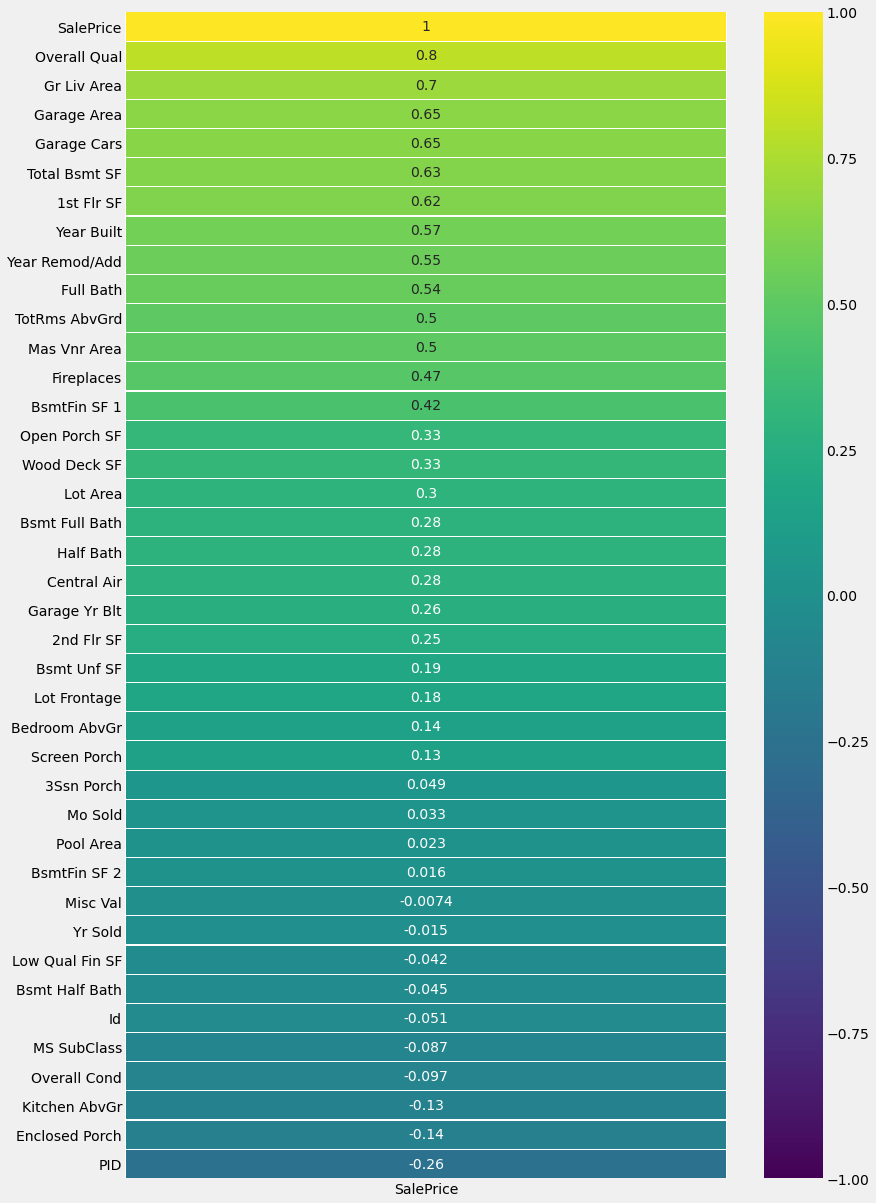

In [25]:
#Using heatmap organized by 'SalePrice' so all our potential features are legible.
corr = ames.corr()

plt.figure(figsize=(12,20))
sns.heatmap(corr[['SalePrice']].sort_values(by ='SalePrice', ascending=False), cmap='viridis', 
            annot=True, vmin=-1, vmax=1, linewidth=0.1, linecolor='w');

In [26]:
corr[['SalePrice']].sort_values(by='SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.649897
Garage Cars,0.647781
Total Bsmt SF,0.629303
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


Dummifying the category columns I'll be using in my model.

In [27]:
ames=pd.get_dummies(ames, columns=['Overall Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                                   'Garage Cond', 'Garage Qual'], drop_first=True)

In [28]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_NoBsmt,Bsmt Cond_Po,Bsmt Cond_TA,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_NoBsmt,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_NoBsmt,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NoFireplace,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NoGarage,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NoGarage,Garage Cond_Po,Garage Cond_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NoGarage,Garage Qual_Po,Garage Qual_TA
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,No,533.0,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,No,637.0,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,No,731.0,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,No,0.0,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,No,0.0,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


Referencing our hypothesis:
We believe the most accurate model will have the overall quality of the home, the home type, and the number of bedrooms/bathrooms, along with measurements of the size and quality of any basement or garage features of the home. 

In [29]:
hypoth_features=ames.drop(columns=['MS Zoning', 'Id', 'PID', 'MS SubClass', 'Neighborhood', 'Lot Frontage', 'Lot Shape', 'Lot Area', 'Land Contour', 'Utilities', 'Heating', 'Heating QC', 'Electrical', 'Lot Config', 
                                   'Land Slope', 'Condition 1', 'Condition 2', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 
                                   'Bsmt Qual', 'Bsmt Exposure', 'Mo Sold', 'Yr Sold', 'Mas Vnr Area', 'Street', 'Central Air', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional', 
                                   'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Paved Drive', 'Bldg Type', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
                                   '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Sale Type', 'SalePrice'])

X=hypoth_features
y=ames['SalePrice']
X.head()

,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_NoBsmt,Bsmt Cond_Po,Bsmt Cond_TA,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_NoBsmt,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_NoBsmt,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NoFireplace,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NoGarage,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NoGarage,Garage Cond_Po,Garage Cond_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NoGarage,Garage Qual_Po,Garage Qual_TA
0,8,1976,2005,533.0,0.0,192.0,725.0,725,754,1479,2,1,3,6,0,1976.0,2.0,475.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,5,1996,1997,637.0,0.0,276.0,913.0,913,1209,2122,2,1,4,8,1,1997.0,2.0,559.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,7,1953,2007,731.0,0.0,326.0,1057.0,1057,0,1057,1,0,3,5,0,1953.0,1.0,246.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,5,2006,2007,0.0,0.0,384.0,384.0,744,700,1444,2,1,3,7,0,2007.0,2.0,400.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,8,1900,1993,0.0,0.0,676.0,676.0,831,614,1445,2,0,3,6,0,1957.0,2.0,484.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [30]:
hypoth_features.shape

(2051, 68)

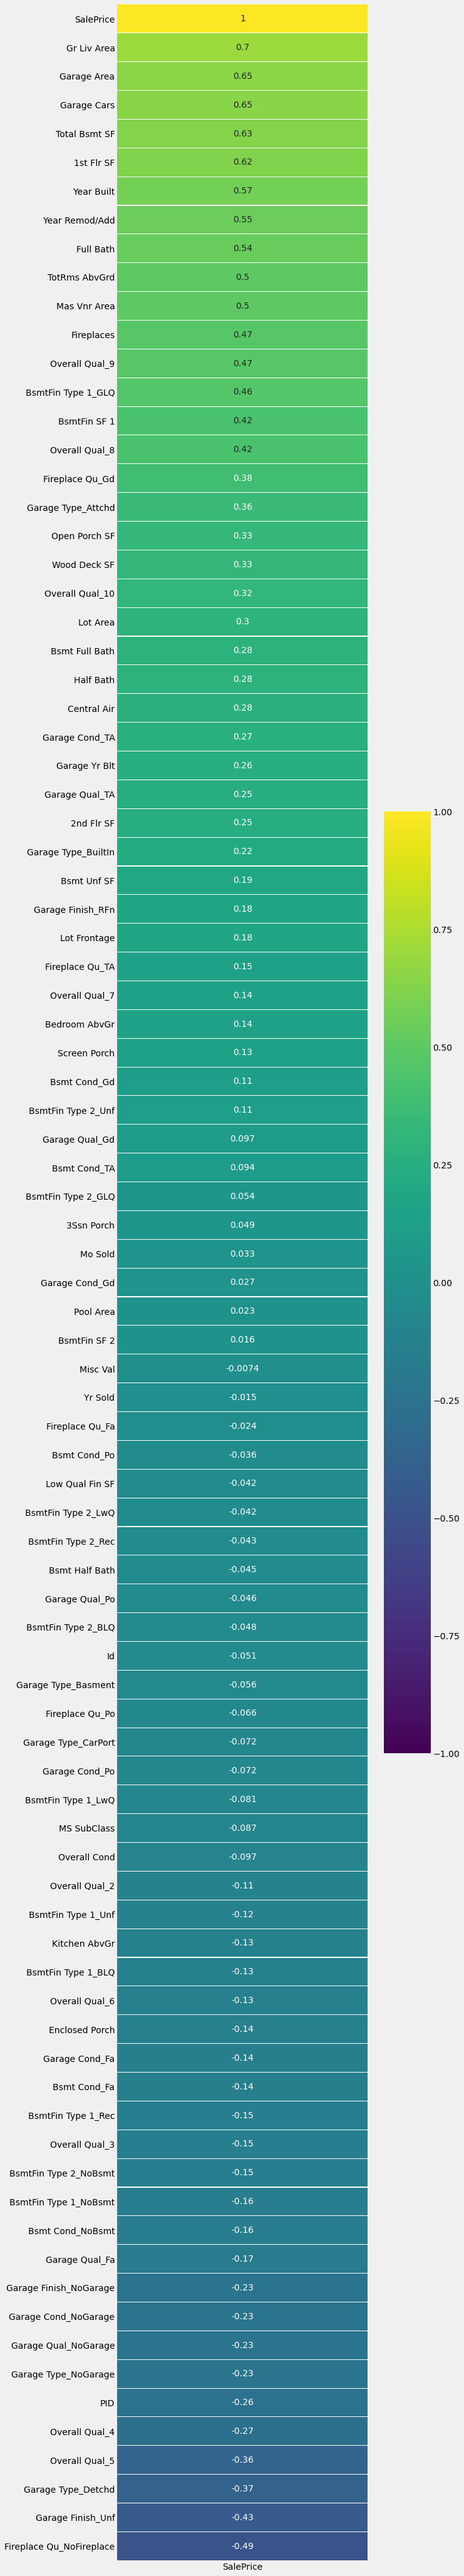

In [31]:
corr = ames.corr()

plt.figure(figsize=(8,70))
sns.heatmap(corr[['SalePrice']].sort_values(by ='SalePrice', ascending=False), cmap='viridis', 
            annot=True, vmin=-1, vmax=1, linewidth=0.1, linecolor='w');

## ***Modeling & Inference***
---

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.score(X_train, y_train)

0.8492090308453037

In [36]:
lr.score(X_test, y_test)

0.8734615483283554

In [37]:
cross_val_score(lr, X_train, y_train).mean()

-124022594999.6586

In [38]:
y_train.mean()

181694.84395318595

In [39]:
lr.intercept_

-743777.4438077133

In [40]:
lr.coef_

array([ 6.99763191e+03,  3.41003382e+02,  1.23868154e+02,  1.74301739e+00,
        1.46519874e+01, -3.78453152e+00,  1.26104734e+01,  3.29276444e+01,
        2.77452763e+01,  6.37303195e+00,  7.06284125e+03,  2.48521271e+03,
        1.68876871e+03,  2.37283985e+02,  1.05957300e+04, -7.37745416e+01,
        1.38327577e+04,  8.28649210e+00,  3.03755727e+03,  7.85857803e+03,
        6.45565874e+03,  7.84314898e+03,  1.02322156e+04,  2.42267493e+04,
        6.26240705e+04,  1.30474810e+05,  1.27444642e+05,  2.26279470e+03,
        7.62835457e+03,  4.37988217e+03,  6.40698141e+03,  5.20433279e+03,
        1.02702530e+03,  6.42905090e+03, -9.98966915e+03,  4.37988217e+03,
       -2.46311804e+03, -9.64063775e+03, -1.21751687e+04,  6.32823029e+03,
       -1.83847903e+04, -3.14750026e+04, -1.87276593e+04, -6.94755522e+03,
       -4.16073718e+04, -2.90142889e+04, -3.43306309e+04, -4.37640841e+04,
       -3.79820999e+04,  1.87103140e+04,  6.53032159e+03,  2.15383258e+04,
       -7.83033512e+03,  

In [41]:
pd.DataFrame({
    'column' : X.columns,
    'coef'   : lr.coef_
})

,column,coef
0,Overall Cond,6997.631914
1,Year Built,341.003382
2,Year Remod/Add,123.868154
3,BsmtFin SF 1,1.743017
4,BsmtFin SF 2,14.651987
5,Bsmt Unf SF,-3.784532
6,Total Bsmt SF,12.610473
7,1st Flr SF,32.927644
8,2nd Flr SF,27.745276
9,Gr Liv Area,6.373032


In [42]:
y_hat = lr.predict(X)

In [43]:
resids = y - y_hat

resids[:10]

0   -64886.604497
1    -7618.262043
2   -26856.406296
3    13761.078998
4     -763.440723
5   -24471.929288
6   -13229.615624
7     -926.422581
8    15448.073092
9   -60068.824644
Name: SalePrice, dtype: float64

In [44]:
resids.mean()

38.13279020169347

In [45]:
mse = np.mean(resids**2)

mse

910370048.4998769

In [46]:
RMSE=mse**0.5
RMSE

30172.339128743017

In [47]:
baseline=ames['SalePrice'].mean()
baseline

181469.70160897123

In [48]:
null_mse = np.mean((y - baseline)**2)

null_mse

6278872217.837828

In [49]:
# The R2
r_2 = 1 - (mse / null_mse)

r_2

0.8550105788243977

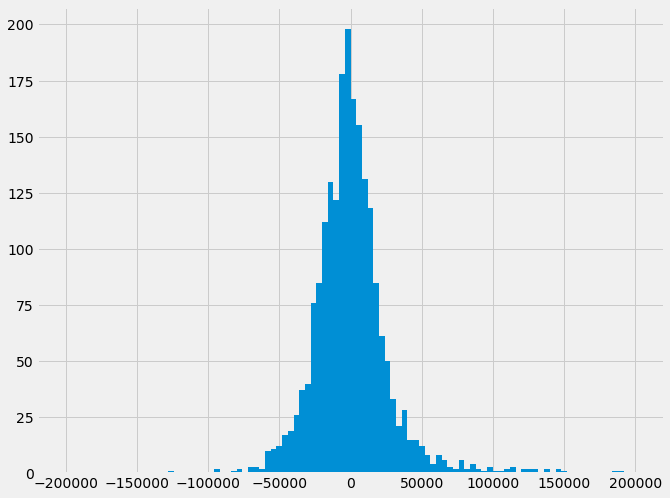

In [55]:
#Plotting the residuals to see how they're distributed.
plt.figure(figsize=(10,8))
plt.hist(resids, bins =100, range=(-200000, 200000));

There are some outliers particularly on the right-hand side. But overall, the residuals are normally distributed.

## ***Conclusion & Recommendations***
---
The features that we included in our model do have measurable impact on the sale price of the home, however they do not provide the most complete or accurate calculations of the sale price. Our hypothesis that the most accurate model will have the overall quality of the home, the home type, and the number of bedrooms/bathrooms, along with measurements of the size and quality of any basement or garage features of the home was not correct.

We recommend using this model to develop an even more accurate model by dropping outliers from the data, possibly removing some of the redundant features (such as ‘Total Bsmt SF’ when we have ‘Bsmt Fin SF’) and adding in other features that may offer better insight such as measurements of the masonry and decks included in the home.
